# Boston Crime Data Set

## Introduction
Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. Records in the new system begin in June of 2015.

## Motivation

<p>Safety is a primary concern&nbsp;</p>

<p>CrimeReports helps residents see and understand where&nbsp;<em>crime</em>&nbsp;is happening in their neighborhood and engage with their local law enforcement agencies.</p>


## Who gets benefited?

<h3>Police</h3>

<ul>
	<li>This gives the boston police the area which requires more attention</li>
	<li>Help them distribute their resources and patroling</li>
</ul>

<h3>Hospitals</h3>

<ul>
	<li>Keep The hospitals on alert depending on the time and&nbsp;criticality of the crime&nbsp;</li>
	<li>Distribute Resources (Ambulance and other medical equipments</li>
</ul>

<h3>Community</h3>

<ul>
	<li>Will help them to keep their kin safe.</li>
	<li>Can avoid Streets with high crime rates</li>
	<li>Educate the general popuplation</li>
</ul>

<h3>Tourists and Foreign students</h3>

<ul>
	<li>Select a friendly neighbourhood</li>
	<li>Take measures to keep themself safe</li>
</ul>

<p>&nbsp;</p>


In [279]:

%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import seaborn as sns
import datetime
import matplotlib as mpl
import plotly.plotly as py
from plotly.graph_objs import *
from matplotlib.pyplot import GridSpec
from pandas.tools.plotting import scatter_matrix
from sklearn.datasets import make_blobs
import missingno as msno
import pivottablejs
import pandas_profiling
import logging

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

In [280]:
data_code= pd.read_csv("rmsoffensecodes.csv")

In [281]:
data = pd.read_csv("crime.csv",encoding = "ISO-8859-1")

In [282]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182021867,3114,Investigate Property,INVESTIGATE PROPERTY,D4,131,NaN,2018-03-23 22:07:00,2018,3,Friday,22,Part Three,MARLBOROUGH ST,42.353731,-71.075489,"(42.35373104, -71.07548929)"
1,I182021864,3115,Investigate Person,INVESTIGATE PERSON,B2,282,NaN,2018-03-23 22:07:00,2018,3,Friday,22,Part Three,WASHINGTON ST,42.328663,-71.085634,"(42.32866284, -71.08563401)"
2,I182021858,724,Auto Theft,AUTO THEFT,D4,271,NaN,2018-03-23 08:30:00,2018,3,Friday,8,Part One,REED ST,42.334724,-71.076603,"(42.33472388, -71.07660307)"
3,I182021854,3115,Investigate Person,INVESTIGATE PERSON,A1,115,NaN,2018-03-23 18:00:00,2018,3,Friday,18,Part Three,ATLANTIC AVE,42.349978,-71.056838,"(42.34997840, -71.05683752)"
4,I182021853,3301,Verbal Disputes,VERBAL DISPUTE,C11,338,NaN,2018-03-23 20:03:00,2018,3,Friday,20,Part Three,FIFIELD ST,42.309292,-71.063304,"(42.30929183, -71.06330360)"


In [283]:
data["OCCURRED_ON_DATE"] = pd.to_datetime(data["OCCURRED_ON_DATE"],format="%Y-%m-%d %H:%M:%S")

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272388 entries, 0 to 272387
Data columns (total 17 columns):
INCIDENT_NUMBER        272388 non-null object
OFFENSE_CODE           272388 non-null int64
OFFENSE_CODE_GROUP     272388 non-null object
OFFENSE_DESCRIPTION    272388 non-null object
DISTRICT               270965 non-null object
REPORTING_AREA         272388 non-null object
SHOOTING               880 non-null object
OCCURRED_ON_DATE       272388 non-null datetime64[ns]
YEAR                   272388 non-null int64
MONTH                  272388 non-null int64
DAY_OF_WEEK            272388 non-null object
HOUR                   272388 non-null int64
UCR_PART               272308 non-null object
STREET                 262167 non-null object
Lat                    255751 non-null float64
Long                   255751 non-null float64
Location               272388 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 35.3+ MB


In [285]:
pandas_profiling.ProfileReport(data)

Number of variables,17
Number of observations,272388
Total Missing (%),6.8%
Total size in memory,35.3 MiB
Average record size in memory,136.0 B
Numeric,6
Categorical,10
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [286]:
data['Location'].isnull().sum()

0

In [287]:
data.DISTRICT.unique()

array(['D4', 'B2', 'A1', 'C11', 'B3', 'E13', 'E18', nan, 'E5', 'C6',
       'A15', 'D14', 'A7'], dtype=object)

In [288]:
def getLatitude(x):
    k = x.replace("(","")
    k = k.replace(")","")
    k = k.replace(" ","")
    k = k.split(',')
    k[0] = float(k[0])
#     print(k[0])
    return(k[0])

In [289]:
def getLongitude(x):
    k = x.replace("(","")
    k = k.replace(")","")
    k = k.replace(" ","")
    k = k.split(',')
    k[1] = float(k[1])
#     print(k[1])
    return(k[1])

In [290]:
getLatitude(data.iloc[0]["Location"])

42.35373104

In [291]:
data["latitude"] = data['Location']
data["latitude"] =  data["latitude"].apply(lambda x: getLatitude(x))

In [292]:
data["longitude"] = data['Location']
data["longitude"] =  data["longitude"].apply(lambda x: getLongitude(x))

In [293]:
data = data.drop(columns=["Lat","Long","Location"])

In [294]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,latitude,longitude
0,I182021867,3114,Investigate Property,INVESTIGATE PROPERTY,D4,131,NaN,2018-03-23 22:07:00,2018,3,Friday,22,Part Three,MARLBOROUGH ST,42.353731,-71.075489
1,I182021864,3115,Investigate Person,INVESTIGATE PERSON,B2,282,NaN,2018-03-23 22:07:00,2018,3,Friday,22,Part Three,WASHINGTON ST,42.328663,-71.085634
2,I182021858,724,Auto Theft,AUTO THEFT,D4,271,NaN,2018-03-23 08:30:00,2018,3,Friday,8,Part One,REED ST,42.334724,-71.076603
3,I182021854,3115,Investigate Person,INVESTIGATE PERSON,A1,115,NaN,2018-03-23 18:00:00,2018,3,Friday,18,Part Three,ATLANTIC AVE,42.349978,-71.056838
4,I182021853,3301,Verbal Disputes,VERBAL DISPUTE,C11,338,NaN,2018-03-23 20:03:00,2018,3,Friday,20,Part Three,FIFIELD ST,42.309292,-71.063304


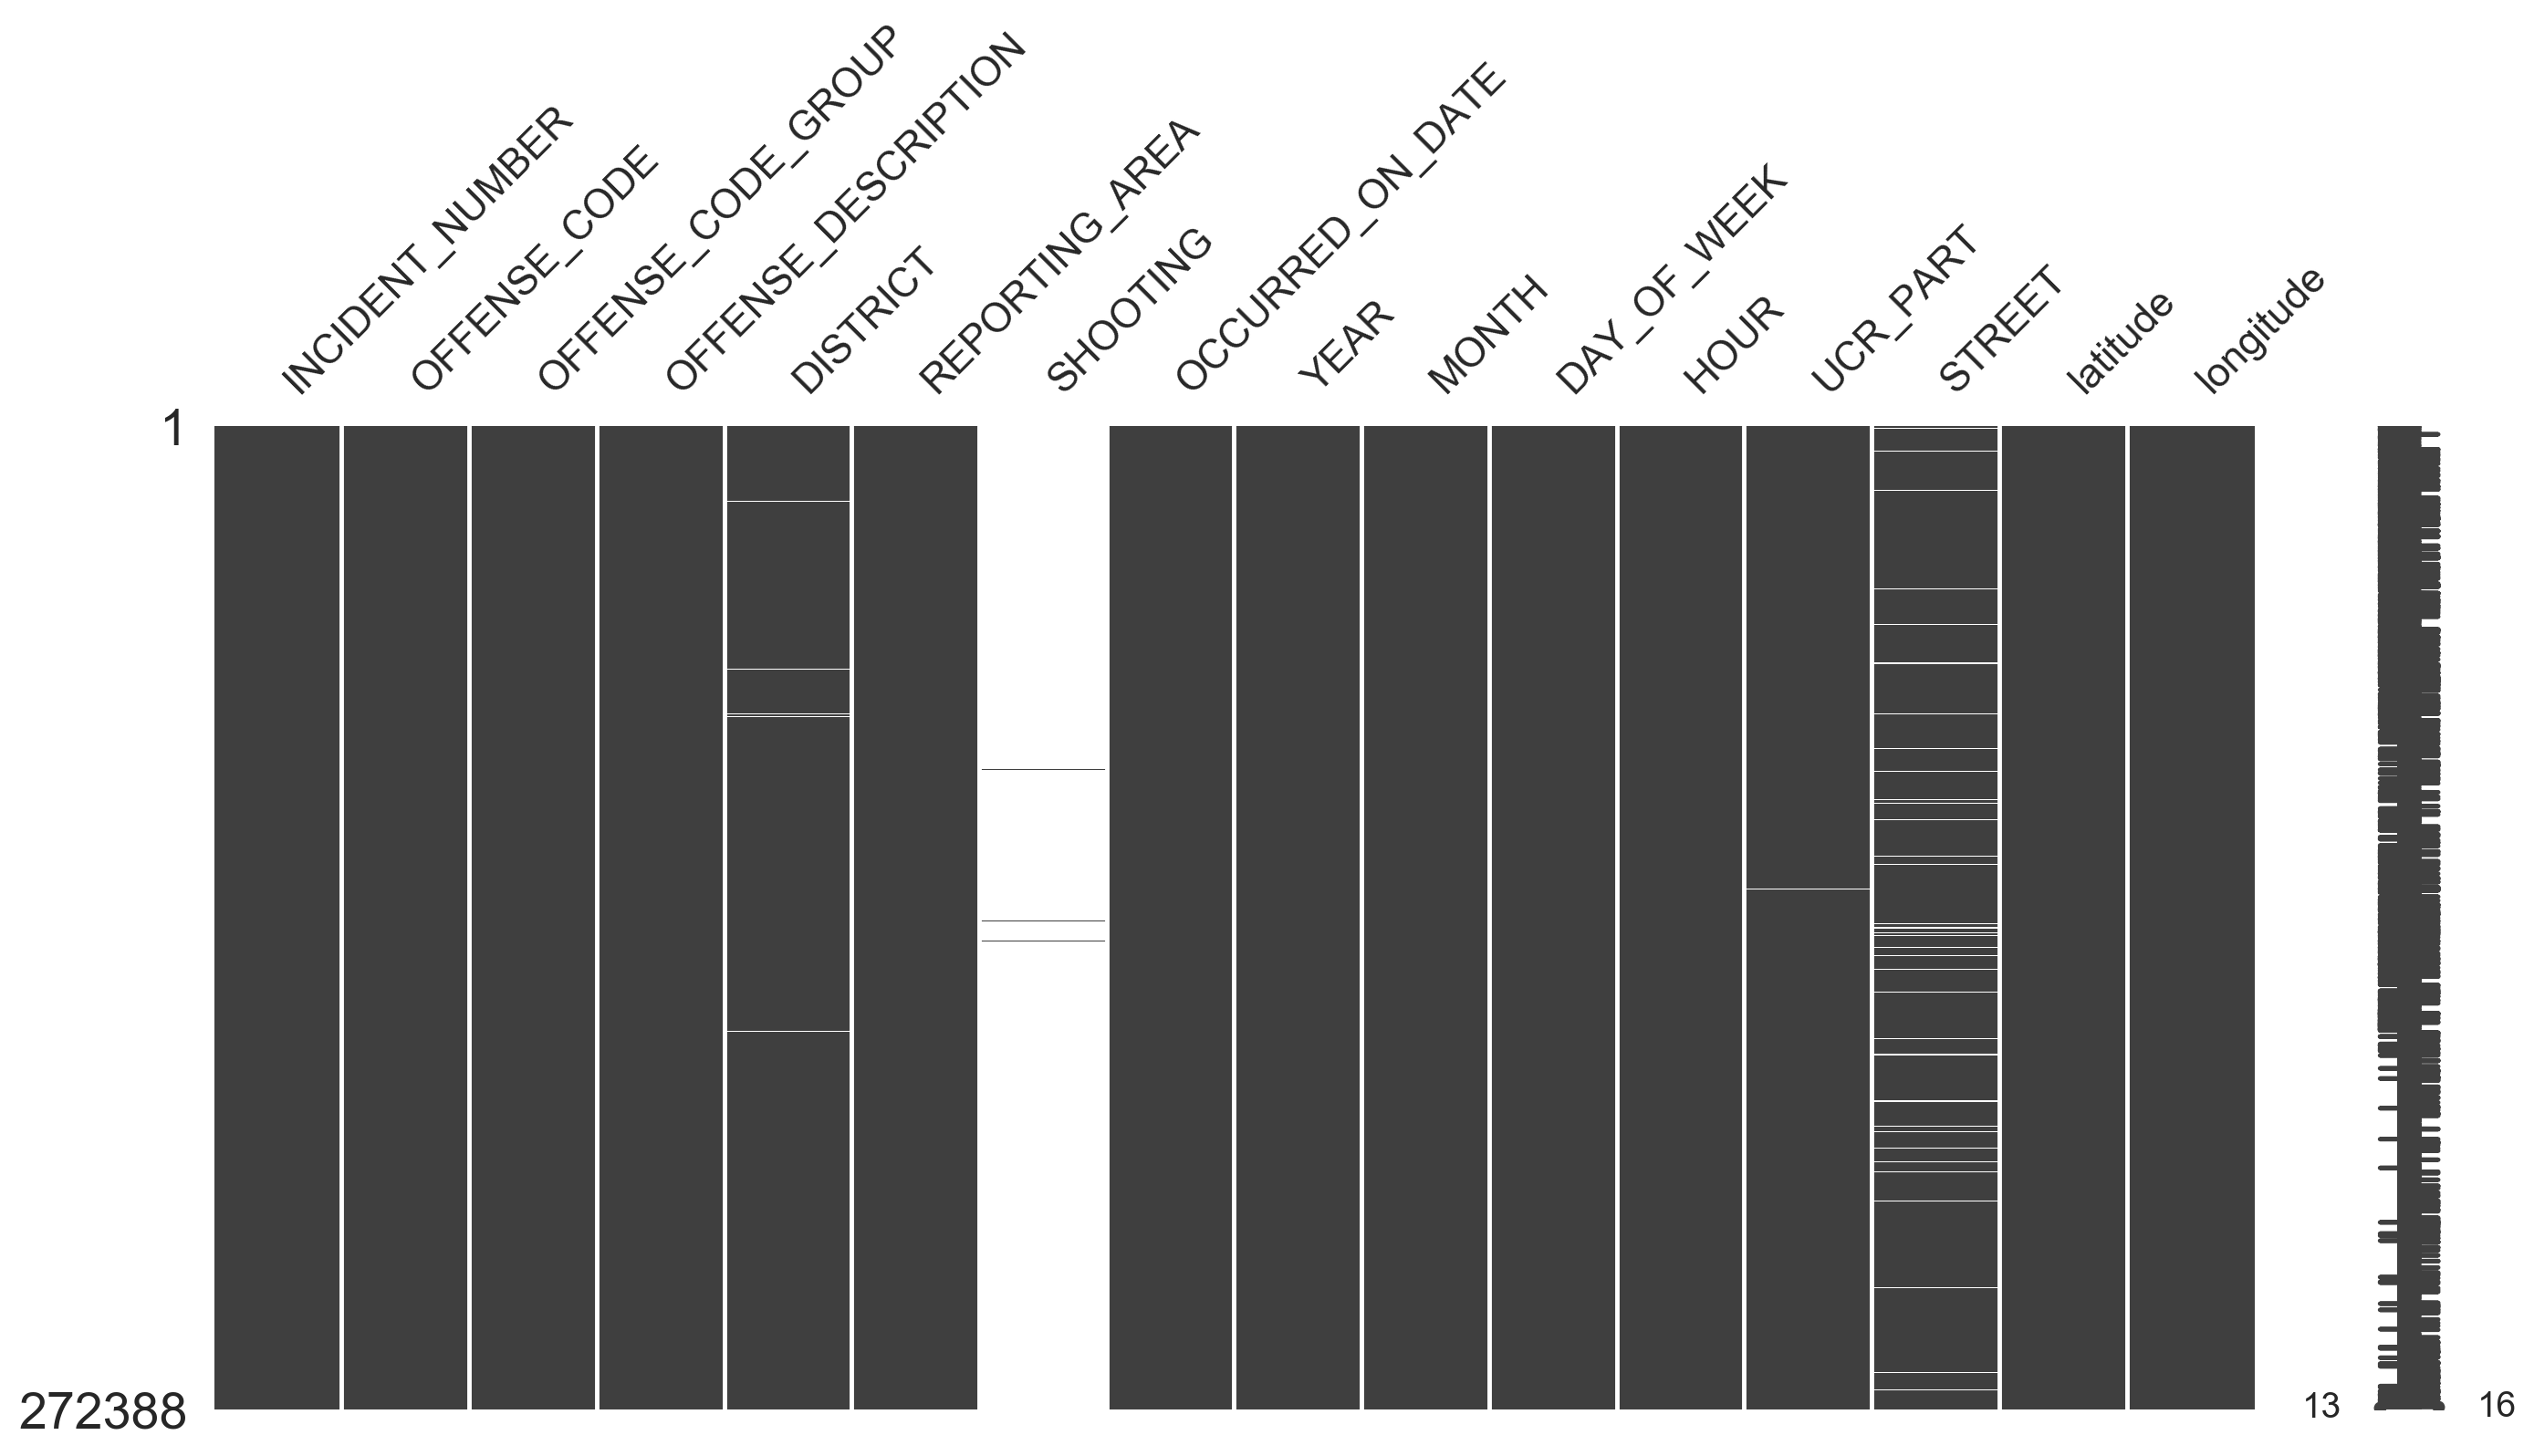

In [295]:
msno.matrix(data, figsize = (16, 7), )

In [296]:
data_areaCode = pd.read_csv("areacodes.csv")

In [297]:
data_areaCode.head()

,DISTRICT,Names
0,D4,South End
1,B2,Roxbury
2,A1,Downtown & Charlestown
3,C11,Dorchester
4,B3,Mattapan


In [298]:
data = pd.merge(data,data_areaCode,on="DISTRICT")

In [299]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,latitude,longitude,Names
0,I182021867,3114,Investigate Property,INVESTIGATE PROPERTY,D4,131,NaN,2018-03-23 22:07:00,2018,3,Friday,22,Part Three,MARLBOROUGH ST,42.353731,-71.075489,South End
1,I182021858,724,Auto Theft,AUTO THEFT,D4,271,NaN,2018-03-23 08:30:00,2018,3,Friday,8,Part One,REED ST,42.334724,-71.076603,South End
2,I182021852,616,Larceny,LARCENY THEFT OF BICYCLE,D4,628,NaN,2018-03-23 08:00:00,2018,3,Friday,8,Part One,PARK DR,42.344167,-71.103591,South End
3,I182021845,3810,Motor Vehicle Accident Response,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,D4,631,NaN,2018-03-23 19:20:00,2018,3,Friday,19,Part Three,COMMONWEALTH AVE,42.349318,-71.101737,South End
4,I182021837,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,134,NaN,2018-03-23 12:00:00,2018,3,Friday,12,Part Two,BOYLSTON ST,42.350379,-71.076261,South End


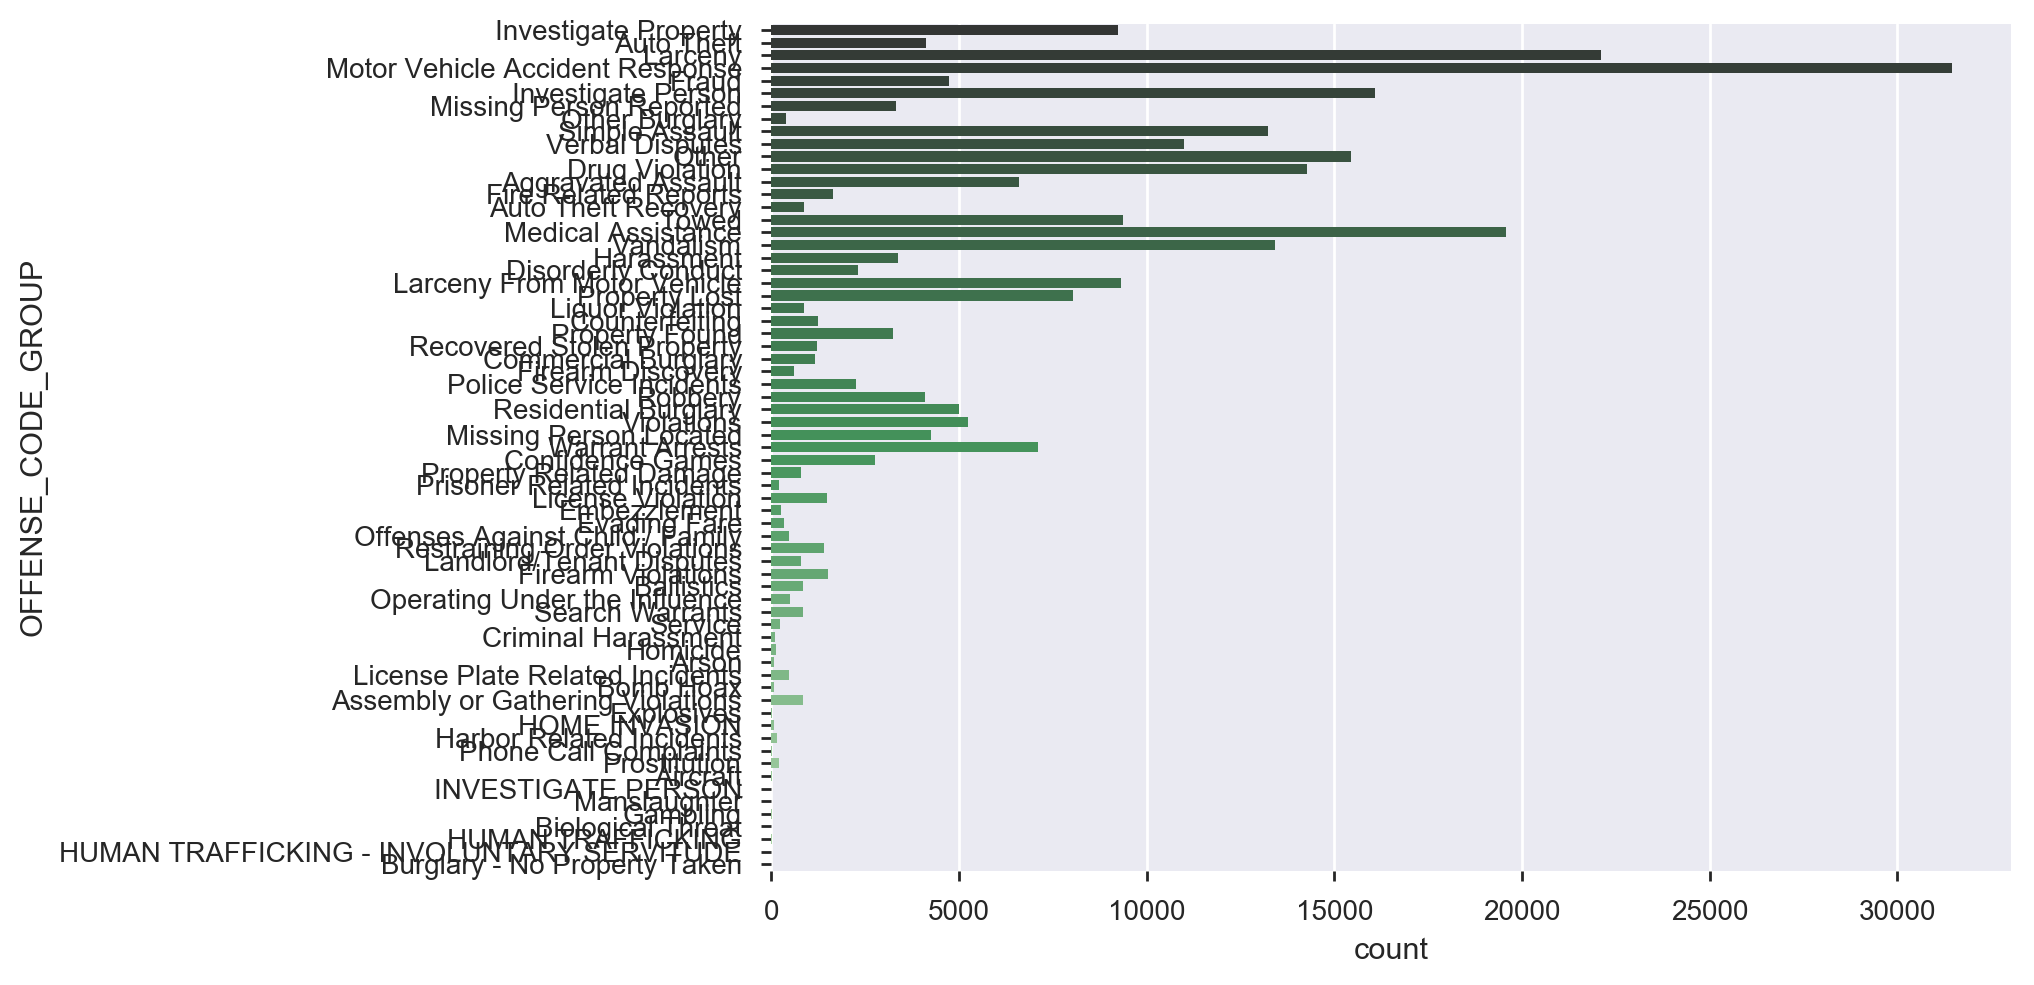

In [236]:
sns.countplot(y="OFFENSE_CODE_GROUP", data=data, palette="Greens_d",);

In [237]:
data_limit = data[:100]

In [238]:
data_limit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 17 columns):
INCIDENT_NUMBER        100 non-null object
OFFENSE_CODE           100 non-null int64
OFFENSE_CODE_GROUP     100 non-null object
OFFENSE_DESCRIPTION    100 non-null object
DISTRICT               100 non-null object
REPORTING_AREA         100 non-null object
SHOOTING               0 non-null object
OCCURRED_ON_DATE       100 non-null datetime64[ns]
YEAR                   100 non-null int64
MONTH                  100 non-null int64
DAY_OF_WEEK            100 non-null object
HOUR                   100 non-null int64
UCR_PART               100 non-null object
STREET                 100 non-null object
latitude               100 non-null float64
longitude              100 non-null float64
Names                  100 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 14.1+ KB


In [239]:
data_limit.to_csv("data_limit.csv")

In [240]:
!pip install plotly

In [241]:
!pip install --upgrade pip plotly
import plotly.plotly as py

Requirement already up-to-date: pip in c:\users\sreer\anaconda3\envs\learn_python\lib\site-packages
Requirement already up-to-date: requests in c:\users\sreer\anaconda3\envs\learn_python\lib\site-packages (from plotly)
Requirement already up-to-date: six in c:\users\sreer\anaconda3\envs\learn_python\lib\site-packages (from plotly)
Requirement already up-to-date: nbformat>=4.2 in c:\users\sreer\anaconda3\envs\learn_python\lib\site-packages (from plotly)
Requirement already up-to-date: chardet<3.1.0,>=3.0.2 in c:\users\sreer\anaconda3\envs\learn_python\lib\site-packages (from requests->plotly)
Requirement already up-to-date: idna<2.7,>=2.5 in c:\users\sreer\anaconda3\envs\learn_python\lib\site-packages (from requests->plotly)
Requirement already up-to-date: urllib3<1.23,>=1.21.1 in c:\users\sreer\anaconda3\envs\learn_python\lib\site-packages (from requests->plotly)
Requirement already up-to-date: certifi>=2017.4.17 in c:\users\sreer\anaconda3\envs\learn_python\lib\site-packages (from req

Cache entry deserialization failed, entry ignored
Cache entry deserialization failed, entry ignored
Cache entry deserialization failed, entry ignored
Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
Cache entry deserialization failed, entry ignored
Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
Cache entry deserialization failed, entry ignored
Cache entry deserialization failed, entry ignored
Cache entry deserialization failed, entry ignored
Cache entry deserialization failed, entry ignored
Cache entry deserialization failed, entry ignored
Cache entry deserialization failed, entry ignored
Cache entry deserialization failed, entry ignored
Cache entry deserialization failed, entry ignored
Cache entry deserialization failed, entry ignored


In [242]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [243]:

import plotly.figure_factory as ff
import pandas as pd

df = data_limit
import plotly 
# plotly.tools.set_credentials_file(username='sreeragsreenath', api_key='1ZM5p13XqSD3GUmwHdH4')

table = ff.create_table(df)
py.iplot(table)

AttributeError: module 'plotly' has no attribute 'figure_factory'

In [ ]:
import plotly.plotly as py
from plotly.graph_objs import *


mapbox_access_token = 'pk.eyJ1Ijoic3JlZXJhZ3NyZWVuYXRoIiwiYSI6ImNqZjVsaTF1cjE5YjUzMmwzbTJid3BoaXUifQ.553TOwmpL3IzntYAWKPQQg'

site_lat = df.latitude
site_lon = df.longitude
locations_name = df.Names

data = Data([
    Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=Marker(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=locations_name,
        hoverinfo='text'
    ),
    Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=Marker(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.7
        ),
        hoverinfo='none'
    )]
)
        
layout = Layout(
    title='Nuclear Waste Sites on Campus',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Nuclear Waste Sites on American Campuses')

In [ ]:
data.groupby('OFFENSE_CODE_GROUP').count().sort_values(by=['INCIDENT_NUMBER'],ascending=[False])

In [ ]:
accident_data = data.loc[data['OFFENSE_CODE_GROUP'] == "Motor Vehicle Accident Response"]

In [ ]:
accident_data

In [ ]:
data_count = data.groupby('OFFENSE_CODE_GROUP').count().sort_values(by=['INCIDENT_NUMBER'],ascending=[False])

In [ ]:
data_count = data_count['INCIDENT_NUMBER']

In [ ]:
data_count.to_csv("data_offence.csv")

In [ ]:
data.groupby('Names').count().sort_values(by=['INCIDENT_NUMBER'],ascending=[False])

In [ ]:
crime_data = data.loc[data['latitude'] > 2]
crime_data = crime_data.loc[data['longitude'] > 2]
crime_data

In [210]:
import pandas as pd 
import folium
from folium.plugins import HeatMap

for_map = data.groupby('Names')

max_amount = float(for_map['Names'].sum())

hmap = folium.Map(location=[42.5, -75.5], zoom_start=7, )

hm_wide = HeatMap( zip(for_map.latitude.values, for_map.longitude.values, for_map.Amount.values), 
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

folium.GeoJson(district23).add_to(hmap)
hmap.add_child(hm_wide)

TypeError: cannot convert the series to <class 'float'>

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270965 entries, 0 to 270964
Data columns (total 17 columns):
INCIDENT_NUMBER        270965 non-null object
OFFENSE_CODE           270965 non-null int64
OFFENSE_CODE_GROUP     270965 non-null object
OFFENSE_DESCRIPTION    270965 non-null object
DISTRICT               270965 non-null object
REPORTING_AREA         270965 non-null object
SHOOTING               878 non-null object
OCCURRED_ON_DATE       270965 non-null datetime64[ns]
YEAR                   270965 non-null int64
MONTH                  270965 non-null int64
DAY_OF_WEEK            270965 non-null object
HOUR                   270965 non-null int64
UCR_PART               270885 non-null object
STREET                 261619 non-null object
latitude               270965 non-null float64
longitude              270965 non-null float64
Names                  270965 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 47.2+ MB


In [263]:
data_time = data.groupby(data.OCCURRED_ON_DATE.map(lambda t: t.minute))

In [265]:
data_time = data.groupby(['OCCURRED_ON_DATE'])[''].mean()

In [274]:
data_time = data.groupby(data.OCCURRED_ON_DATE.map(lambda t: t.day))

,OFFENSE_CODE,YEAR,MONTH,HOUR,latitude,longitude
0,3114,2018,3,22,42.353731,-71.075489
1,3838,4036,6,30,84.688455,-142.152092
2,4454,6054,9,38,127.032622,-213.255683
3,8264,8072,12,57,169.381940,-284.357421
4,9366,10090,15,69,211.732319,-355.433682
5,9985,12108,18,85,254.070222,-426.505134
6,13100,14126,21,103,296.410859,-497.580857
7,16902,16144,24,121,338.750759,-568.660157
8,17519,18162,27,138,381.103904,-639.737796
9,18136,20180,30,154,423.439110,-710.808899


In [301]:
data = data.groupby(data.DAY_OF_WEEK).count()

In [302]:
data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,latitude,longitude,Names
DAY_OF_WEEK,,,,,,,,,,,,,,,,,
Friday,41173,41173,41173,41173,41173,41173,118,41173,41173,41173,41173,41173,41163,39755,41173,41173,41173
Monday,38764,38764,38764,38764,38764,38764,94,38764,38764,38764,38764,38764,38748,37396,38764,38764,38764
Saturday,38016,38016,38016,38016,38016,38016,193,38016,38016,38016,38016,38016,38007,36679,38016,38016,38016
Sunday,34221,34221,34221,34221,34221,34221,144,34221,34221,34221,34221,34221,34206,33160,34221,34221,34221
Thursday,39542,39542,39542,39542,39542,39542,122,39542,39542,39542,39542,39542,39532,38155,39542,39542,39542
Tuesday,39476,39476,39476,39476,39476,39476,100,39476,39476,39476,39476,39476,39468,38070,39476,39476,39476
Wednesday,39773,39773,39773,39773,39773,39773,107,39773,39773,39773,39773,39773,39761,38404,39773,39773,39773
